In [31]:
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [32]:
dataset_path = "hfactory_magic_folders/colas_data_challenge/computer_vision_challenge/dataset/"

In [33]:
train_labels = pd.read_csv(dataset_path + "labels_train.csv")


In [34]:
train_labels

,filename,FISSURE,REPARATION,FISSURE LONGITUDINALE,FAÏENCAGE,MISE EN DALLE
0,BDCAEROD0000000017183099_runway_3_gridsize_512...,0,0,1,1,0
1,BDCAEROD0000000017183055_runway_1_gridsize_512...,0,0,1,0,0
2,BDCAEROD0000000017183118_runway_1_gridsize_512...,1,0,1,0,0
3,BDCAEROD0000000017183028_runway_1_gridsize_512...,1,0,0,0,0
4,BDCAEROD0000000017183088_runway_1_gridsize_512...,0,0,0,0,0
...,...,...,...,...,...,...
825,BDCAEROD0000000017183055_runway_1_gridsize_512...,0,0,0,0,0
826,BDCAEROD0000000017183095_runway_1_gridsize_512...,1,1,1,0,1
827,BDCAEROD0000000017182994_runway_1_gridsize_512...,0,1,0,1,0
828,BDCAEROD0000000017183099_runway_3_gridsize_512...,0,1,1,1,0


In [35]:
train_image = []
for i in tqdm(range(train_labels.shape[0])):
    img = load_img(dataset_path + "train/" + train_labels["filename"][i], target_size=(400,400,3))
    img = img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 830/830 [00:05<00:00, 153.87it/s]


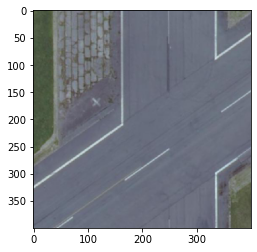

In [36]:
plt.imshow(X[2])

In [37]:
y = np.array(train_labels.drop(["filename"], axis=1))

In [38]:
y

array([[0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [40]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [41]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [44]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/20
11/11 [==============================] - 5s 178ms/step - loss: 0.4470 - acc: 0.6099 - val_loss: 0.3994 - val_acc: 0.9036
Epoch 2/20
11/11 [==============================] - 1s 119ms/step - loss: 0.4417 - acc: 0.5994 - val_loss: 0.4060 - val_acc: 0.8072
Epoch 3/20
11/11 [==============================] - 1s 119ms/step - loss: 0.4263 - acc: 0.5572 - val_loss: 0.3862 - val_acc: 0.7108
Epoch 4/20
11/11 [==============================] - 1s 118ms/step - loss: 0.4155 - acc: 0.5617 - val_loss: 0.3835 - val_acc: 0.6566
Epoch 5/20
11/11 [==============================] - 1s 117ms/step - loss: 0.3973 - acc: 0.5542 - val_loss: 0.3975 - val_acc: 0.6446
Epoch 6/20
11/11 [==============================] - 1s 119ms/step - loss: 0.3961 - acc: 0.5572 - val_loss: 0.3817 - val_acc: 0.5964
Epoch 7/20
11/11 [==============================] - 1s 118ms/step - loss: 0.3795 - acc: 0.5738 - val_loss: 0.3692 - val_acc: 0.6807
Epoch 8/20
11/11 [==============================] - 1s 116ms/step - loss: 0.